## Exercise: Simple Data Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df_new = df.iloc[:7]
df_new.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df_new.shape

(7, 4)

Text(0.5, 1.0, 'TV vs Sales')

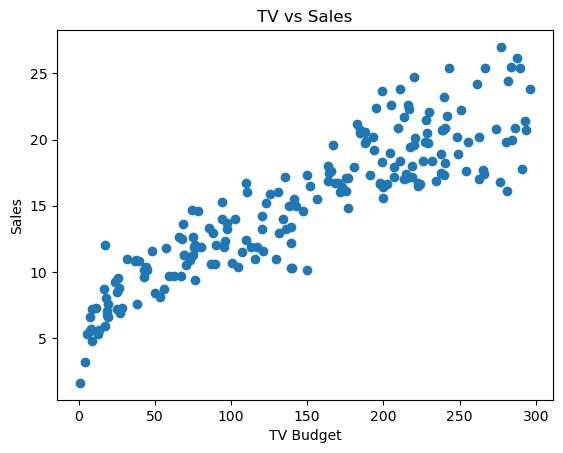

In [6]:
plt.scatter(data=df,x='TV',y='Sales')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('TV vs Sales')

# Exercise: Simple kNN Regression

In [23]:
df_adv = pd.read_csv('advertising.csv')
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
df_adv.shape

(200, 4)

In [25]:
# Get a subset of the data i.e. rows 5 to 13
# Use the TV column as the predictor
x_true = df_adv.TV.iloc[5:13]

# Use the Sales column as the response
y_true = df_adv.Sales.iloc[5:13]


In [26]:
x_true

5       8.7
6      57.5
7     120.2
8       8.6
9     199.8
10     66.1
11    214.7
12     23.8
Name: TV, dtype: float64

In [27]:
y_true

5      7.2
6     11.8
7     13.2
8      4.8
9     15.6
10    12.6
11    17.4
12     9.2
Name: Sales, dtype: float64

In [28]:
# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(x_true).values 

In [29]:
# Get the predictor data in the order given by idx above
x_true  = x_true.iloc[idx].values

# Get the response data in the order given by idx above
y_true  = y_true.iloc[idx].values

In [30]:
x_true

array([  8.6,   8.7,  23.8,  57.5,  66.1, 120.2, 199.8, 214.7])

In [31]:
y_true

array([ 4.8,  7.2,  9.2, 11.8, 12.6, 13.2, 15.6, 17.4])

In [32]:
### edTest(test_findnearest) ###
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  
# Note that this is just for k = 1 where the distance function is 
# simply the absolute value.

def find_nearest(array,value):
    
    # Hint: To find idx, use .idxmin() function on the series
    idx = pd.Series(np.abs(array-value)).idxmin()

    # Return the nearest neighbor index and value
    return idx, array[idx]

In [33]:
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))


In [34]:
# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):

    # Get the Sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi )[0]]

Text(0, 0.5, 'Sales in $1000')

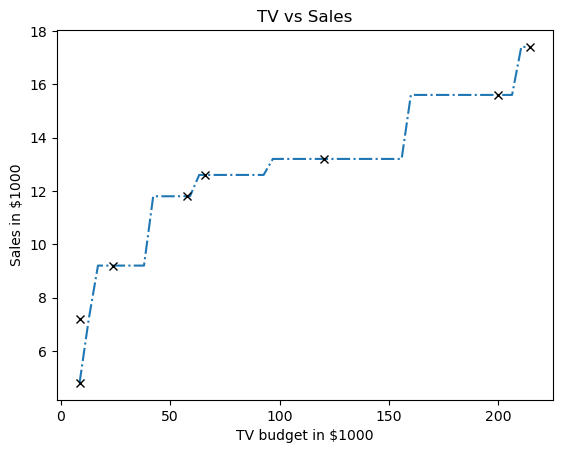

In [35]:
# Plot the synthetic data along with the predictions    
plt.plot(x, y, '-.')

# Plot the original data using black x's.
plt.plot(x_true,y_true, 'kx')

# Set the title and axis labels
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

# KNN for K >= 1 USING SCIKIT LEARN

In [36]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [37]:
df_adv.shape

(200, 4)

In [40]:
x = df_adv[['TV']]
y = df_adv['Sales']

In [41]:
### edTest(test_shape) ###

# Split the dataset in training and testing with 60% training set 
# and 40% testing set with random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,random_state=42)

In [42]:
### edTest(test_nums) ###

# Choose the minimum k value based on the instructions given on the left
k_value_min = 1

# Choose the maximum k value based on the instructions given on the left
k_value_max = 70


# Create a list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70)

C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


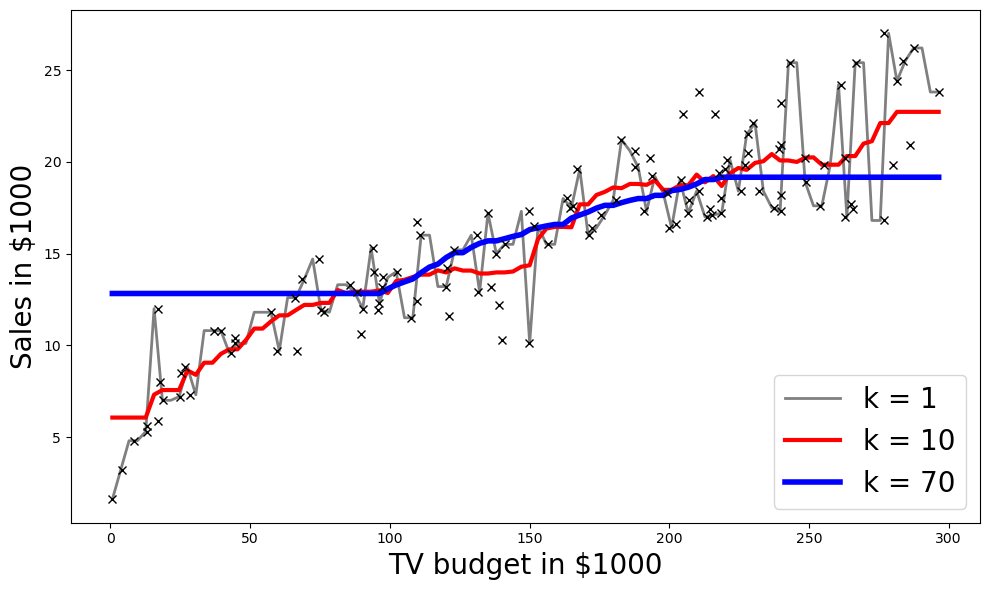

In [63]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

# Variable used to alter the linewidth of each plot
j=0

# Loop over all the k values
for k_value in k_list:   
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(x_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='train',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

# FIND THE BEST K IN KNN REGRESSION

In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [71]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [72]:
df.shape

(200, 4)

In [73]:
# Set the 'TV' column as predictor variable
x = df[['TV']]

# Set the 'Sales' column as response variable 
y = df['Sales']


In [74]:
### edTest(test_shape) ###
# Split the dataset in training and testing with 60% training set and 
# 40% testing set 
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6,random_state=66)


In [75]:
### edTest(test_nums) ###
# Choosing k range from 1 to 70
k_value_min = 1
k_value_max = 70

# Create a list of integer k values between k_value_min and 
# k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)

C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


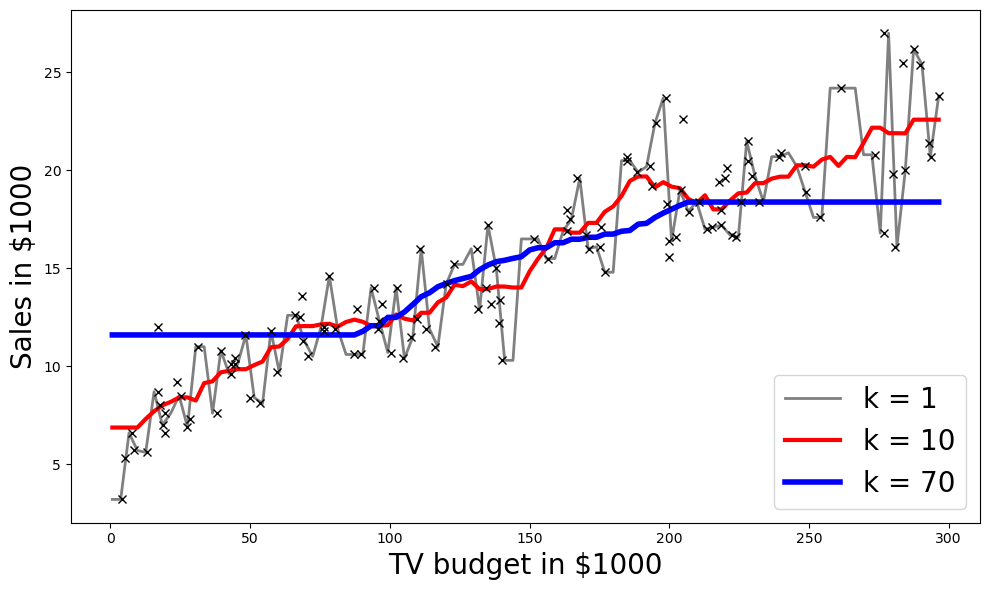

In [76]:
# Setup a grid for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10,6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j=0

# Loop over all k values
for k_value in k_list:   
    
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y_test,y_pred)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE
    
    
    # Helper code to plot the data and various kNN model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

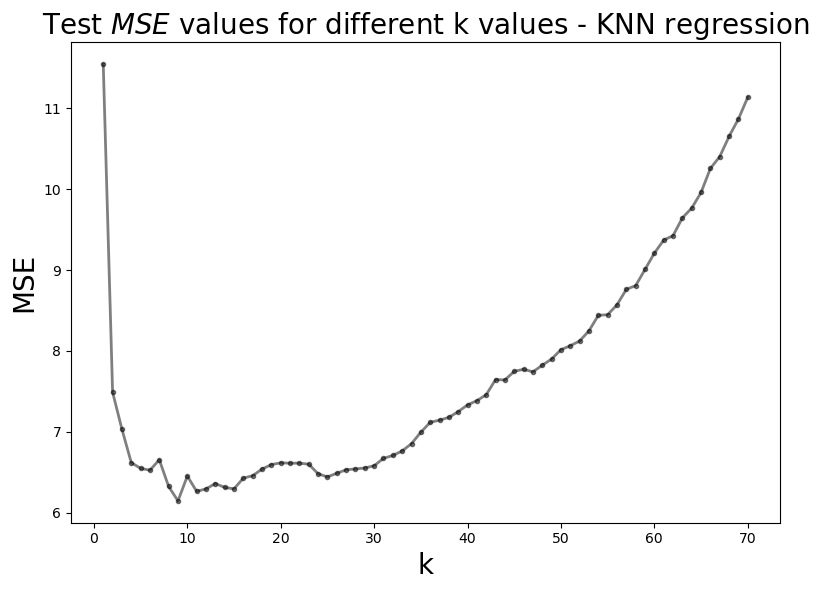

In [77]:
# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(),knn_dict.values(),'k.-',alpha=0.5,linewidth=2)

# Set the title and axis labels
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()


In [79]:
### edTest(test_mse) ###

# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]

# Print the best k-value
print ("The best k value is ",best_model,"with a MSE of ", min_mse)

The best k value is  [9] with a MSE of  6.144391975308642


In [81]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")

The R2 score for your model is 0.7967532467913663
